# Loading Assignment 4 images and weights

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/eip/session4/model_weights_55.26%.h5" "weights_55.26%.h5"

In [3]:
!wget  -P /content/ "http://cs231n.stanford.edu/tiny-imagenet-200.zip"

!unzip -qq tiny-imagenet-200.zip 
!rm tiny-imagenet-200.zip

--2019-07-12 11:17:58--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘/content/tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  64.6MB/s    in 5.7s    

2019-07-12 11:18:04 (41.4 MB/s) - ‘/content/tiny-imagenet-200.zip’ saved [248100043/248100043]



In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mplib
import numpy as np
from imutils import paths
import os
import cv2
from random import shuffle

import keras
from imgaug import augmenters as iaa

from random import randint

from tensorflow.keras.callbacks import Callback
import tensorflow as tf
import tensorflow.keras.backend as K

train_location = '/content/tiny-imagenet-200/train/'
test_location  = '/content/tiny-imagenet-200/test/'
valid_location = '/content/tiny-imagenet-200/val/'

num_classes = len(next(os.walk(train_location))[1])

f = open("tiny-imagenet-200/wnids.txt", "r")
labels = []
for line in f:
  labels.append(line.split()[0])

print('Loading Train images')
train_path = list(paths.list_images(train_location))
y_train = []
shuffle(train_path)

for img in train_path:
  img_id=img.split('/')[-3]
  if img_id in labels:
    y_train.append(labels.index(img_id))


x_train = [cv2.imread(file) for file in train_path]
x_train = np.array(x_train)



Using TensorFlow backend.


Loading Train images


# Model Definition

In [0]:
def space_to_depth_x4(x):
    return tf.space_to_depth(x, block_size=4)
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

In [6]:
model = tf.keras.models.Model()

img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]


input = tf.keras.layers.Input(shape=(img_height, img_width, channel,),name = 'input')



# Block 1

# Layer 1
layer1 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
layer1 = tf.keras.layers.BatchNormalization(name='norm_1')(layer1)
layer1 = tf.keras.layers.ReLU(name='relu_1')(layer1)


# Layer 2
layer2 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(layer1)
layer2 = tf.keras.layers.BatchNormalization(name='norm_2')(layer2)
layer2 = tf.keras.layers.ReLU(name='relu_2')(layer2)


# Layer 3
layer3 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(layer2)
layer3 = tf.keras.layers.BatchNormalization(name='norm_3')(layer3)
layer3 = tf.keras.layers.ReLU(name='relu_3')(layer3)

# Layer 4
layer4 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(layer3)
layer4 = tf.keras.layers.BatchNormalization(name='norm_4')(layer4)
layer4 = tf.keras.layers.ReLU(name='relu_4')(layer4)

# Layer 5

layer5 = tf.keras.layers.Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_5', use_bias=False)(layer4)
layer5 = tf.keras.layers.BatchNormalization(name='norm_5')(layer5)
layer5 = tf.keras.layers.ReLU(name='relu_5')(layer5)

layer5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_1')(layer5)



# Block 2

# Layer 6
layer6 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(layer5)
layer6 = tf.keras.layers.BatchNormalization(name='norm_6')(layer6)
layer6 = tf.keras.layers.ReLU(name='relu_6')(layer6)


# Layer 7
layer7 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(layer6)
layer7 = tf.keras.layers.BatchNormalization(name='norm_7')(layer7)
layer7 = tf.keras.layers.ReLU(name='relu_7')(layer7)


# Layer 8
layer8 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(layer7)
layer8 = tf.keras.layers.BatchNormalization(name='norm_8')(layer8)
layer8 = tf.keras.layers.ReLU(name='relu_8')(layer8)

layer9 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_2')(layer8)

skip_connection_1 = layer9

# Block 3

# Layer 10
layer10 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(layer9)
layer10 = tf.keras.layers.BatchNormalization(name='norm_10')(layer10)
layer10 = tf.keras.layers.ReLU(name='relu_10')(layer10)


# Layer 11
layer11 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(layer10)
layer11 = tf.keras.layers.BatchNormalization(name='norm_11')(layer11)
layer11 = tf.keras.layers.ReLU(name='relu_11')(layer11)


# Layer 12
layer12 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_12', use_bias=False)(layer11)
layer12 = tf.keras.layers.BatchNormalization(name='norm_12')(layer12)
layer12 = tf.keras.layers.ReLU(name='relu_12')(layer12)


layer13 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_3')(layer12)

skip_connection_2 = layer13

# Block 4

# Layer 14
layer14 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(layer13)
layer14 = tf.keras.layers.BatchNormalization(name='norm_14')(layer14)
layer14 = tf.keras.layers.ReLU(name='relu_14')(layer14)


# Layer 15
layer15 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(layer14)
layer15 = tf.keras.layers.BatchNormalization(name='norm_15')(layer15)
layer15 = tf.keras.layers.ReLU(name='relu_15')(layer15)

# Layer 16
layer16 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(layer15)
layer16 = tf.keras.layers.BatchNormalization(name='norm_16')(layer16)
layer16 = tf.keras.layers.ReLU(name='relu_16')(layer16)

layer17 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_4')(layer16)


# Block 5

skip_connection_1 = tf.keras.layers.Lambda(space_to_depth_x4,name='Skip_1')(skip_connection_1)
skip_connection_2 = tf.keras.layers.Lambda(space_to_depth_x2,name='Skip_2')(skip_connection_2)

layer18 = tf.keras.layers.concatenate([skip_connection_1,skip_connection_2, layer17],name='Concatenate')

layer19 = tf.keras.layers.Conv2D(num_classes, (1,1), strides=(1,1), name='conv_21', use_bias=False)(layer18) 

layer20 = tf.keras.layers.GlobalAveragePooling2D(name='GAP')(layer19)



layer21 = tf.keras.layers.Flatten(name='Flatten')(layer20)

output = tf.keras.layers.Activation('softmax',name='Activation')(layer21)

W0712 11:18:43.138114 140635932882816 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model = tf.keras.models.Model(inputs=[input], outputs=[output])
model.summary()
# tpu_model = tf.contrib.tpu.keras_to_tpu_model(
#      model,
#     strategy=tf.contrib.tpu.TPUDistributionStrategy(
#         tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#     )
# )
# tpu_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=tf.keras.losses.categorical_crossentropy,
#     metrics=['accuracy']
# )
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 64, 64, 128)  3456        input[0][0]                      
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 64, 64, 128)  512         conv_1[0][0]                     
__________________________________________________________________________________________________
relu_1 (ReLU)                   (None, 64, 64, 128)  0           norm_1[0][0]                     
____________________________________________________________________________________________

In [0]:
model.load_weights("/content/weights_55.26%.h5")

# GradCAM
  

In [0]:
from keras.preprocessing import image
import tensorflow.keras.backend as K
import numpy as np
import cv2
import sys
img = x_train[0]

In [0]:
j = 50
preds = model.predict(x_train[0:j])
final_map = []
for k in range(0,j):
  class_idx = np.argmax(preds[k])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv_21")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x_train[k:k+1]])
  
  for i in range(200):
     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(-255 *(heatmap - [1]))
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  final_map.append(heatmap)

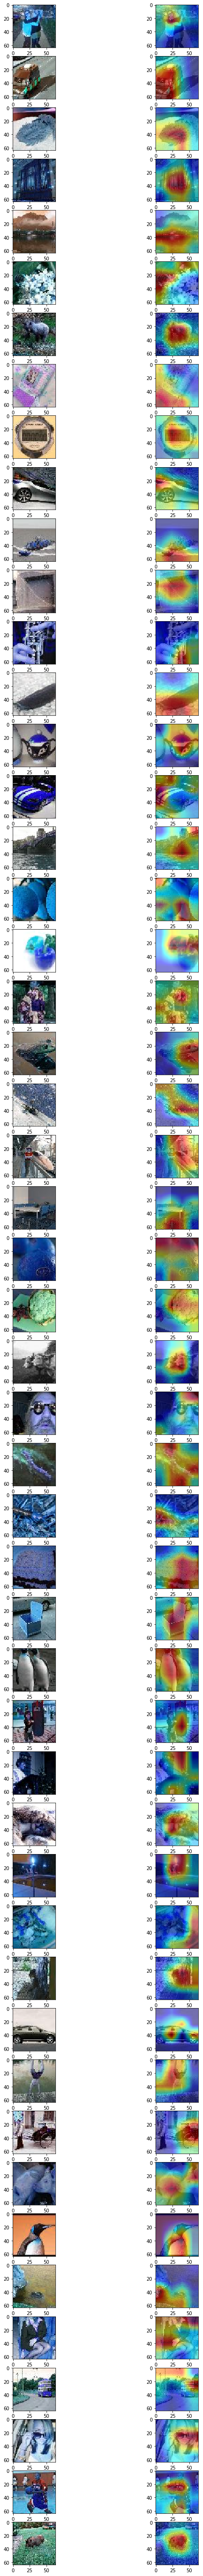

In [11]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,100))
k = 1

for i in range(0,j):
  img = x_train[i]
  superimposed_img = cv2.addWeighted(img, 0.5, final_map[i], 0.5, 0)


  fig.add_subplot(j,2,k)
  plt.imshow(img)

  fig.add_subplot(j,2,k+1)

  k = k+2

  plt.imshow(superimposed_img)